In [79]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [80]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [81]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [82]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3643.jpg', 'with_mask_1550.jpg', 'with_mask_483.jpg', 'with_mask_1837.jpg', 'with_mask_2716.jpg']
['with_mask_2388.jpg', 'with_mask_2678.jpg', 'with_mask_781.jpg', 'with_mask_3546.jpg', 'with_mask_1197.jpg']


In [83]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2595.jpg', 'without_mask_143.jpg', 'without_mask_3805.jpg', 'without_mask_532.jpg', 'without_mask_3771.jpg']
['without_mask_97.jpg', 'without_mask_1401.jpg', 'without_mask_2133.jpg', 'without_mask_2486.jpg', 'without_mask_251.jpg']


In [84]:
with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
np.save('with_mask.npy', data)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [85]:
without_mask_path = 'data/without_mask/'

data = []

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
np.save('without_mask.npy', data)

In [142]:
import numpy as np
from sklearnex import svm
from sklearnex.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [143]:
with_mask = np.load('with_mask.npy', allow_pickle=True)
without_mask = np.load('without_mask.npy', allow_pickle=True)

In [144]:
wm = with_mask.shape
wtm = without_mask.shape

In [145]:
wm[0]

3725

In [146]:
wtm[0]

3828

In [147]:
with_mask = with_mask.reshape(wm[0], 49152)
without_mask = without_mask.reshape(wtm[0],49152)

In [148]:
X = np.r_[with_mask, without_mask]

In [153]:
labels = np.zeros(X.shape[0])
labels[3725:] = 1.0
names = {0: 'Mask', 1: 'No Mask'}

In [154]:
# pca = PCA(n_components=3)
# x_train = pca.fit_transform(x_train)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

In [175]:
s = pd.Series(names)
s.describe()

count        2
unique       2
top       Mask
freq         1
dtype: object

In [174]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

SVC()

In [176]:
# x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [177]:
accuracy_score(y_test, y_pred)

0.9121228163049232

In [166]:
print(
    f"Classification report for classifier {svm}:\n"
    f"{classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       930
         1.0       0.92      0.90      0.91       959

    accuracy                           0.91      1889
   macro avg       0.91      0.91      0.91      1889
weighted avg       0.91      0.91      0.91      1889




In [167]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

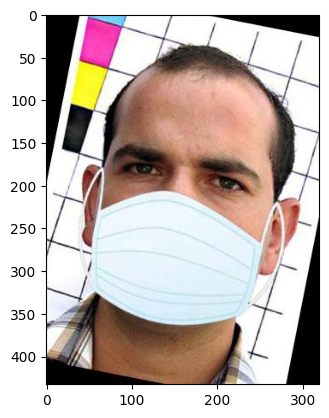

In [181]:
img = mpimg.imread('data/with_mask/with_mask_2000.jpg')
imgplot = plt.imshow(img)
plt.show()

Path of the image to be predicted:  data/with_mask/with_mask_2000.jpg


0.0
0
The person in the image is wearing a mask


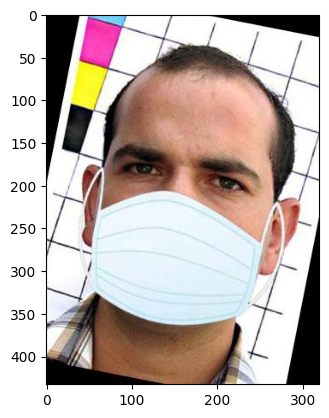

In [182]:
input_image_path = input('Path of the image to be predicted: ')
input_image = mpimg.imread(input_image_path)
plt.imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,49152])
input_prediction = svm.predict(input_image_reshaped)[0]
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')